<a href="https://colab.research.google.com/github/jay10440/play-statistical-projects/blob/main/Fractal_Shenanigans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

I'm pretty much just trying to see how to plot a fractal in R. At some point, I would like to use fractal techniques for finer precision in data analysis, but that's for another day 🎹

#Necessary Packages

In [ ]:
install.packages("ggplot2")
install.packages("Rcpp")
library(ggplot2)
library(Rcpp)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



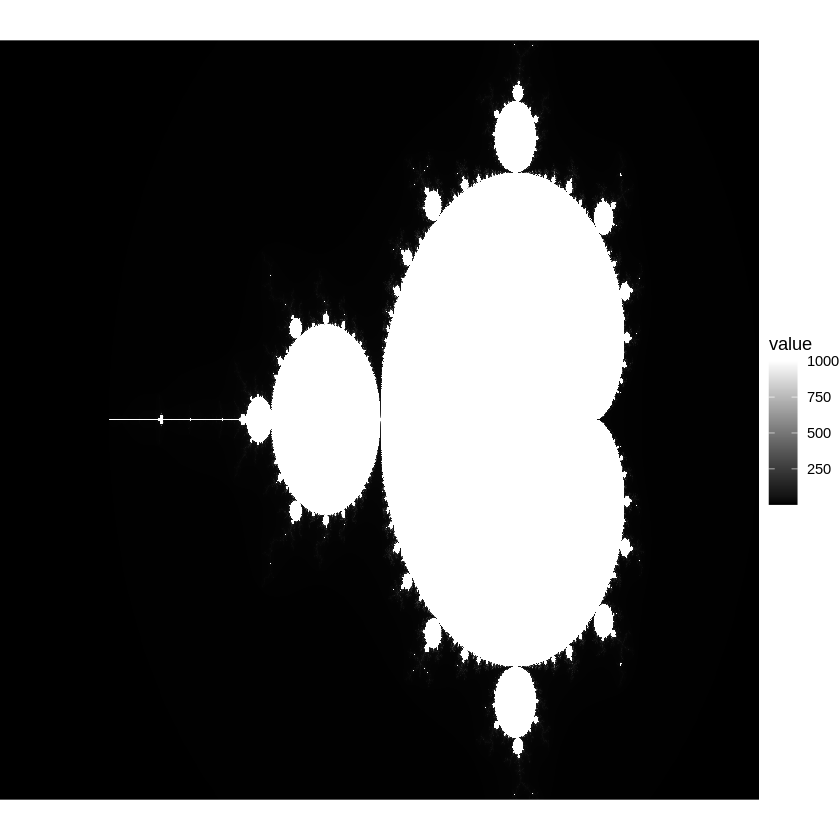

In [ ]:
#Creating the Mandelbrot:
cppFunction('
NumericMatrix mandelbrot(int nx, int ny, int maxIter) {
  NumericMatrix mat(nx, ny);
  for (int i = 0; i < nx; i++) {
    for (int j = 0; j < ny; j++) {
      double x0 = (double)i / (double)nx * 3.5 - 2.5;
      double y0 = (double)j / (double)ny * 2.0 - 1.0;
      double x = 0.0;
      double y = 0.0;
      int iter = 0;
      while (x*x + y*y <= 4.0 && iter < maxIter) {
        double xtemp = x*x - y*y + x0;
        y = 2.0 * x * y + y0;
        x = xtemp;
        iter++;
      }
      mat(i, j) = iter;
    }
  }
  return mat;
}
')

nx <- 800
ny <- 800
maxIter <- 1000
mandelbrot_matrix <- mandelbrot(nx, ny, maxIter)

mandelbrot_df <- as.data.frame(as.table(mandelbrot_matrix))
colnames(mandelbrot_df) <- c("x", "y", "value")

ggplot(mandelbrot_df, aes(x = x, y = y, fill = value)) +
  geom_tile() +
  scale_fill_gradient(low = "black", high = "white") +
  theme_void() +
  coord_fixed()